<a href="https://colab.research.google.com/github/leahiscoding/CART498/blob/main/GAIB_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The one command to know

SHIFT + ENTER to run a cell

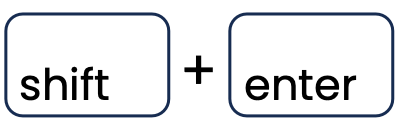

In [2]:
import torch

# Torch (and PyTorch) PyTorch is one of the most popular frameworks for
#  developing and training machine learning and deep learning models.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# CUDA (Compute Unified Device Architecture) is a parallel computing platform
# and programming model developed by NVIDIA for their GPUs. CUDA harness the
# highly parallel processing power of GPUs to perform general-purpose computing
# tasks (i.e., tasks beyond traditional graphics rendering).


Using device: cuda


In [ ]:
# If using models from HuggingFace, you may need to generate and setup a token.
# To authenticate with the Hugging Face Hub, create a token in your settings
# tab (https://huggingface.co/settings/tokens), set it as secret in your Google
# Colab (see "Secrets" in the left sidebar") and restart your session.
# You will be able to reuse this secret in all of your notebooks.



In [ ]:
# It also possible to mount the Colab session into your Google Drive. More about
# this later :)

# Generating text with transformers

The <mark>Transformers Python library</mark>, developed by Hugging Face, is an open-source library <mark>designed for natural language processing (NLP)</mark> and other ML tasks. It
provides a <mark>comprehensive framework for working with pre-trained models</mark>, especially transformer-based architectures like BERT, GPT, T5, and more. The library offers a <mark>unified interface for tasks like text generation, image object detection, and audio transcription</mark>.

The library also provides different levels of complexity. If you prefer simplicity, you can use the `pipeline` feature, which handles all the required processing for making predictions. To use it, you just call the `pipeline()` function and specify the task you want, such as text classification.

Documentation and examples can be found in the official repository:

https://github.com/huggingface/transformers

In [ ]:
# @title
from transformers import pipeline

# Text classification is a core natural language processing (NLP) task where a
# model is trained to categorize text into predefined labels. Common examples
# of text classification tasks include sentiment analysis (positive, negative,
# neutral), spam detection, topic categorization, and language identification.
# The Transformers library provides pre-trained models for text classification.

classifier = pipeline(task="text-classification",
                      model="distilbert-base-uncased-finetuned-sst-2-english",
                      device=device)
# classifier("The concert was a breathtaking experience, and the musicians were  phenomenal.")
# classifier("The painting was intriguing, but I felt it lacked emotional depth.")
# classifier("What is physical love? Half of pleasure.")
# classifier("This day has been awful and lovely, at the same time.")
# classifier("It runs at 60 fps.")
# classifier("I don't dislike it")

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.97850501537323}]

Spend a few minutes experimenting with different phrases to identify one where the model struggles—specifically, where it shows the lowest confidence score. <mark>What phrase causes the model to be least confident in its prediction?</mark>

In [ ]:
# Transformers can also be used for generation

# Initialize a text-generation pipeline
generator = pipeline(task="text-generation",
                     model="openai-community/gpt2",
                     device=device)

# Prompt to be used for continuation
# prompt = "The purpose of surrealist visual techniques"
# prompt = "User: Computer, can you explain Surrealism for me?\n AI:"
prompt = "Q: Who is John Lennon? \n A:"

out = generator(
    prompt,
    max_new_tokens=20,
    do_sample=True,
    temperature=0.1,
    top_p=0.95,
    repetition_penalty=1.2,
    no_repeat_ngram_size=3,
    truncation=True,
    pad_token_id=generator.tokenizer.eos_token_id
)

# Access the generated text
generated_text = out[0]["generated_text"]

import textwrap
# Format the text (example: remove extra spaces, capitalize, or reformat)
formatted_text = generated_text.strip()  # Remove leading/trailing spaces

# Split the output text at 80 characters (for display purposes)
formatted_text = textwrap.fill(formatted_text, width=80)

# Print the formatted output
print(formatted_text)



Device set to use cuda


Q: Who is John Lennon?   A: I'm not sure. He's a very good singer, but he was
born in the United States


<mark>Run the above cell multiple times and try different prompts. Observe how the text-generation task produces different results</mark>. Do all of them seem plausible? Which ones are accurate, and how can you determine their correctness?

# Generating audio with Transformers

The Transformers library include models capable of generating audio, including music. One model for this purpose is MusicGen (2023), which was developed by Meta AI. The [MusicGen-Small](https://huggingface.co/facebook/musicgen-small) variant is a lightweight model (300M parameters, low RAM footprint) designed to generate music based on a textual prompt.

In [ ]:
from transformers import pipeline

# Generating sound clips
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)

# data = pipe("chill groove for a winter afternoon")
# data = pipe("upbeat groove for a sunny summer morning")
data = pipe("hardcore cumbia for a winter afternoon")

Device set to use cuda


In [ ]:
print(data)

{'audio': array([[[-0.01566792, -0.01766551, -0.0167145 , ...,  0.01948969,
          0.02122621,  0.02322831]]], dtype=float32), 'sampling_rate': 32000}


In [ ]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))

<mark>Spend a few minutes experimenting with different prompts to “create music”</mark> inspired by the traditional sounds and styles of your home country. You can try a larger model (e.g., [MusicGen-Medium](https://huggingface.co/facebook/musicgen-medium), 1.5B parameters), but note that larger models require more compute and longer inference times.

# Basic image generation with Diffusers

The Diffusers library is developed and maintained by Hugging Face. It comes with several diffusion models for image, video, and audio generation.

You can find the source code and documentation on GitHub:

https://github.com/huggingface/diffusers

In [13]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "Lykon/dreamshaper-8",
    # "stabilityai/sd-turbo",
    torch_dtype=torch.float16,
    variant="fp16",
    ).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

CLIPFeatureExtractor appears to have been deprecated in transformers. Using CLIPImageProcessor instead.


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['rid of the frame and artwork only in one photo # an image as if perceived by a non - human sensing system : partial occlusions, uneven resolution, ambiguous scale, artifacts suggesting compression or reconstruction rather than human vision but collage. # do not include a literal drawing of a human, but use it as an inspiration # do not include any border or photo / image frame. provide the artwork / image only.']


  0%|          | 0/50 [00:00<?, ?it/s]

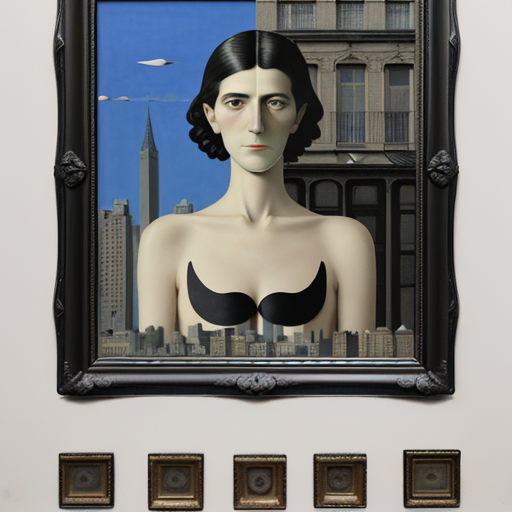

In [49]:
# prompt = "A generative abstract image composed of layered geometric forms, emergent symmetry, controlled randomness, limited palette of three colors, no figurative elements, visual structure suggests algorithmic repetition and drift."
# prompt = "A detailed, surrealistic view of a park, with people enjoying \
# barbecues and playing pétanque. collage within one photo"
prompt = "An A surrealist, Rene Magritte-inspired, photomontage (collage) of a 20th-century art, with visible scissor-cut edges (collage) within the photo, giving a texture that you were collaging a photo, Max Ernst style \
# Inspired by Daniil Kharms and Kafka's novel. \
Photo in one frame, but get rid of the frame and artwork only in one photo \
# An image as if perceived by a non-human sensing system: partial occlusions, uneven resolution, ambiguous scale, artifacts suggesting compression or reconstruction rather than human vision but collage. \
# Do not include a literal drawing of a human, but use it as an inspiration \
# Do not include any border or photo/image frame. Provide the artwork/image only. "


# prompt = "A fashion editorial image shot in a luxury studio, but styled with everyday objects, improvised materials, visible seams, and imperfections, deliberately resisting polish."
pipe(prompt).images[0]

In [50]:
# We can also use other diffusion models, for example stable diffusion, hosted
# by RunwayML on HuggingFace
from diffusers import DiffusionPipeline

model_id = "segmind/tiny-sd"  # or any other compatible model
# model_id = "stabilityai/sdxl-turbo"
pipe = DiffusionPipeline.from_pretrained(model_id,
                                         dtype=torch.bfloat16, device_map="cuda")


model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/647M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.bfloat16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['# no photo frame']


  0%|          | 0/50 [00:00<?, ?it/s]

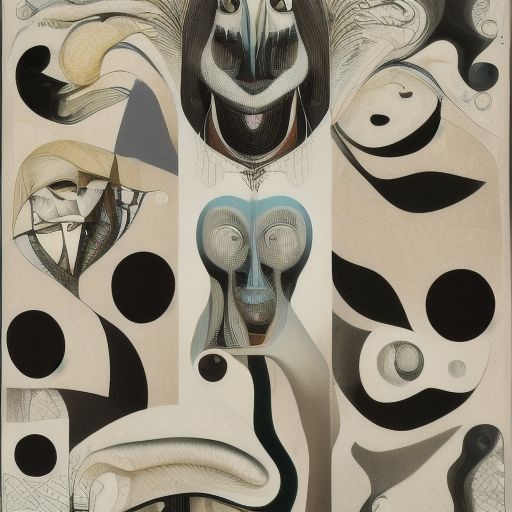

In [81]:
# prompt = "A generative abstract image composed of layered geometric forms, emergent symmetry, controlled randomness, limited palette of three colors, no figurative elements, visual structure suggests algorithmic repetition and drift."
# prompt = "A portrait of a person, neutral expression, natural lighting — no dramatic lighting, no cinematic framing, no fantasy elements, no stylization, no exaggerated features."
# prompt = "An image as if perceived by a non-human sensing system: partial occlusions, uneven resolution, ambiguous scale, artifacts suggesting compression or reconstruction rather than human vision."
prompt = "A surrealist, generative, absurdist, and abstract image inspired by DADA using human body parts \
# photomontage (collage-style) of a 19-21th-century art \
# Must include visible scissor-cut or collage edges texture within the photo, Max Ernst style \
# Inspired by Kharms and Kafka's novel \
# Artwork only in one photo, \
# No photo frame "


pipe(prompt).images[0]

In [ ]:
# Define your prompt
prompt = "A generative abstract image composed of layered geometric forms, emergent symmetry, controlled randomness, limited palette of three colors, no figurative elements, visual structure suggests algorithmic repetition and drift."
# prompt = (
#     "A 1950s diner on Mars with hovering cars parked outside, "
#     "in the style of Brazilian bossa nova and MPB album covers, "
#     "cinematic lighting, detailed scene, hyperrealistic textures, "
# )

# Generate and save the image
image = pipe(prompt).images[0]
image

# If instead of displaying the resulting media object we want to save it to the
# Linux machine where you are running your code, you can do:
image.save("output_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

Note that this file, “output_image.png”, will be saved in the current folder. You can see this folder by pressing the Folder icon (i.e., "Files") in the left sidebar.

There, you can preview or download your file.

# Connecting Google Drive

Additionally, you can access the files from your machine. In Google Colab, <mark>you can mount Google Drive to access files stored in your Drive</mark>.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


After running the cell, you'll see a URL link to connect to your Google
Account. Click on the link and sign in. Sometimes, you can be required to copy
an authentication code. Go back to Colab, paste the code into the prompt, and press Enter. If correctly mounted, you will see a new "drive" folder on Colab.

Your Google Drive files will be available under the directory

`/content/drive/MyDrive/`

In [ ]:
# You can check and navigate the mounted path by
!ls /content/drive/MyDrive/

## Tips for prompt crafting

### Use adjectives and descriptive phrases

Mention colors, lighting conditions (“neon-lit,” “soft glow,” “dramatic shadows”), and stylistic references (“in the style of a watercolor painting,” “like a 1980s movie poster,” etc.) to guide the model at inference time.

### Combine contrasting themes

Mashing up futuristic and historical, organic and mechanical, or whimsical and eerie can be worth exploring.

### Specify art styles

References to artistic movements (Impressionism, Surrealism, Baroque) or artists (Van Gogh, Frida Kahlo, etc.) help the AI lock onto specific visual aesthetics.

### Experiment with point of view

Ask for close-up shots, wide-angle perspectives, or overhead views to see how composition changes the output.

### Iterate and refine

Start with a broad prompt, then add or replace adjectives and details in subsequent generations to see how small adjustments affect the final images.

<mark>Play with these ideas and push your prompts to understand both the strengths and quirks of generative image models.</mark>